# 3. 데이터전처리 및 시각화


## 3.1. 데이터 재구조화
- 현업에서는 분석가가 수집한 데이터가 원하는 형태로 수집되지 않아서 따로 변형 시켜야하는 경우가 빈번이 발생됩니다.
- 또한 각 그룹에 따른 통계량을 보고싶은 경우에도 코딩을 통한 데이터의 변형이 필요하게됩니다.
- 수집한 데이터를 데이터에 활용하기 위해서 원하는 형태로
변형해야 하는 일은 빈번히 발생하며,  
주로 사용되는 형태
변환은 long → wide, wide → long의 형태로 변형하는 경우가
많습니다.

In [ ]:
# 데이터 읽기 (Sample2.csv)
import numpy as np
import pandas as pd
sample2 = pd.read_csv('sample2.csv')
sample2.head()

,index,col,value
0,1,x1,50
1,2,x1,70
2,1,x2,60
3,2,x2,80
4,1,x3,70


In [ ]:
# 데이터 재구조화(long -> wide) ver1 : 자체 함수 사용하기
sample_wide = sample2.pivot(index = 'index', columns = 'col', values='value')
sample_wide

col,x1,x2,x3
index,,,
1,50,60,70
2,70,80,80


In [ ]:
# 데이터 재구조화(long->wide ver2) : pandas 함수 사용하기
sample_wide2 = pd.pivot_table(sample2, index = 'index', columns='col', values = 'value')
print(list(sample_wide2)) # 데이터프레임의 컬럼명
sample_wide2

['x1', 'x2', 'x3']


col,x1,x2,x3
index,,,
1,50.0,60.0,70.0
2,70.0,80.0,80.0


In [ ]:
sample_wide2 = sample_wide2.reset_index()
print(list(sample_wide2))
sample_wide2

['index', 'x1', 'x2', 'x3']


col,index,x1,x2,x3
0,1,50.0,60.0,70.0
1,2,70.0,80.0,80.0


In [ ]:
# ver1(내장함수), ver2(pandas 함수) 비교
# ver1 :
# 단순히 재배치하는 경우,
# index+columns 조합에 중복이 있으면 안됨
# 1:1 매칭만 될 때 사용 가능

# ver2 :
# 단순히 재배치만 하는 것이 아니라 집계가 가능함
# 원하는 값으로 집계할 수 있음 (aggfunc 옵션)
# NaN을 원하는 값을 지정할 수 있음 (fill_value 옵션)

# 예시 데이터
test_df = pd.DataFrame({
    '날짜': ['1월', '1월', '1월', '2월', '2월', '3월'],
    '과목': ['수학', '수학', '영어', '수학', '영어', '영어'],
    '점수': [80, 90, 85, 70, 100, 95]
})

# ver1: pivot → 중복 있으면 에러
#test_df.pivot(index='날짜', columns='과목', values='점수')

# ver2 : pivot_table → 중복 있어도 집계 (평균)
test_df.pivot_table(index='날짜', columns='과목', values='점수', aggfunc='mean')

# fill_value 사용
# test_df.pivot_table(index='날짜', columns='과목', values='점수', aggfunc='mean', fill_value=0)

과목,수학,영어
날짜,,
1월,85.0,85.0
2월,70.0,100.0
3월,NaN,95.0


In [ ]:
# 데이터 재 구조화(wide -> long)
sample_long = pd.melt(sample_wide2, id_vars = 'index')
sample_long

,index,col,value
0,1,x1,50.0
1,2,x1,70.0
2,1,x2,60.0
3,2,x2,80.0
4,1,x3,70.0
5,2,x3,80.0


## 3.2. 데이터 결합 (Union)
- Union은 데이터 결합의 방법 중 하나로 2개 이상의 데이터를 가로 방향으로 기존 데이터 아래 결합시키는 방법을 의미함
- 기존 데이터 아래로 결합시키는 경우 동일한 컬럼을 기준으로 결합시킴


In [ ]:
# 샘플 데이터 읽기
tb04 = pd.read_csv("tb_order_202104.csv")
tb05 = pd.read_csv("tb_order_202105.csv")

tb04.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2


In [ ]:
# 04월 데이터와 05월 데이터 형태
print(tb04.shape)
print(tb05.shape)

(233262, 10)
(241142, 10)


In [ ]:
# Union 결합
tb_all = pd.concat([tb04, tb05])
print(tb_all.shape)
tb_all.head()

(474404, 10)


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2


In [ ]:
# 중복된 데이터가 있는 경우, 중복 제거가 가능 (원본데이터에 적용할 것인가 : inplace)
tb_all.drop_duplicates(inplace = True)

# index 초기화 하기 (drop : DataFrame내에서 index를 삭제 할 것인가, inplace : 원본데이터에 적용할 것인가)
tb_all.reset_index(drop = True, inplace = True)
tb_all.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2


## 3.3. 데이터 결합 (Left Join)
- Left Join은 데이터 결합의 방법 중 하나로 왼쪽 데이터를 기준으로 오른쪽 데이터를 옆으로 결합시키는 방법을 의미함
- 왼쪽 데이터에 오른쪽 데이터를 결합시키는 경우 “key” 컬럼 이라고 불리우는 컬럼을 기준으로 결합시킴



In [ ]:
# 샘플 데이터 읽기
m_store = pd.read_csv('m_store.csv')
m_store.head()

,store_id,store_name,area_cd
0,1,삼일대로점,SL
1,2,세종대로점,SL
2,3,무교로점,SL
3,4,덕수궁길점,SL
4,5,서소문로점,SL


In [ ]:
# Left Join (on : key컬럼 지정, 컬럼명이 다를경우 left_on, right_on 사용)
order_df = pd.merge(tb_all, m_store, on = 'store_id', how = 'left')
order_df.head()

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd
0,34104383,11,C65806632,57,61573513,2021-04-01 11:00,2021-04-01 11:39,1,28270,1,자양로점,SL
1,70652318,59,C09760173,37,54068709,2021-04-01 11:00,2021-04-01 11:34,0,28270,2,가마산로2점,SL
2,71640388,195,C61227084,17,93678366,2021-04-01 11:00,2021-04-01 11:54,0,26470,9,화중로점,GB
3,75673365,127,C64119972,17,5287952,2021-04-01 11:00,2021-04-01 11:17,0,23080,2,분포로점,BS
4,9077529,174,C10231192,18,18248867,2021-04-01 11:00,2021-04-01 11:35,0,46920,2,하남산단점,GJ


## 3.4. 데이터 시각화
- 실습 데이터는 총 3개의 데이터를 활용합니다.
서울의 지역(시군구)이름 및 코드 정보와, 서울 일별 지역별 날씨 관련 정보 및 눈병 환자 수 데이터, 서울 지역별 년도별 인구수 데이터를 활용합니다.
- 데이터 시각화는 데이터의 특징을 한 눈에 파악할 수 있게 해주기때문에 데이터 분석에서 꼭 필요한 부분이라고 할 수 있습니다.
- 데이터 시각화를 위한 그래프 종류는 굉장히 많은 종류가 있지만, 이번 실습에는 막대그래프, 선그래프, 산점도, 그리고 히트맵이라고하는 그래프를 작성해 봅니다.


In [24]:
# 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 한글 깨짐 문제
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [31]:
# 데이터 읽기
import pandas as pd
import numpy as np

sgg_cd = pd.read_csv("sigungu_code2.csv")
tot_df = pd.read_csv("tot_df_v03.csv")
sgg_cd.head()
tot_df.head()

,SIGUNGU_CD,SIGUNGU_NM
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구


,date,sigungu_cd,sigungu,avg_temp,min_temp,min_temp_time,max_temp,max_temp_time,rain_per_h,rain_per_time,...,avg_humi,min_humi,최고습도,평균풍속,최대풍속,강수량,탁도,pH,잔류염소,eye
0,2014-01-01,11110,종로구,1.8,-1.4,348.0,5.2,1432.0,0.0,NaN,...,60.3,35.7,72.9,1.2,4.9,0.0,0.07,7.1,0.31,2
1,2014-01-01,11140,중구,3.2,0.6,433.0,7.4,1310.0,0.0,NaN,...,60.8,36.0,75.2,2.5,7.9,0.0,0.07,7.2,0.31,1
2,2014-01-01,11170,용산구,5.0,1.9,610.0,8.4,1426.0,0.0,NaN,...,60.1,33.0,71.8,2.1,7.6,0.0,0.07,7.2,0.32,7
3,2014-01-01,11200,성동구,5.3,2.3,658.0,8.7,1445.0,0.0,NaN,...,54.4,29.0,69.9,2.7,7.6,0.0,0.06,7.2,0.32,9
4,2014-01-01,11215,광진구,5.3,0.9,710.0,8.8,1428.0,0.0,NaN,...,60.9,34.1,74.8,1.5,6.4,0.0,0.07,7.1,0.31,6


### 3.4.1. 범주형 데이터 시각화 (막대그래프, 그룹별 통계량)

In [32]:
# tot_df의 date에서 년/월/일 분류하기
tot_df['year']  = tot_df['date'].str[0:4]
tot_df['month'] = tot_df['date'].str[5:7]
tot_df['day']   = tot_df['date'].str[8:10]
tot_df.head()
#tot_df.loc[:,['year', 'month', 'day']].head()

,date,sigungu_cd,sigungu,avg_temp,min_temp,min_temp_time,max_temp,max_temp_time,rain_per_h,rain_per_time,...,평균풍속,최대풍속,강수량,탁도,pH,잔류염소,eye,year,month,day
0,2014-01-01,11110,종로구,1.8,-1.4,348.0,5.2,1432.0,0.0,NaN,...,1.2,4.9,0.0,0.07,7.1,0.31,2,2014,01,01
1,2014-01-01,11140,중구,3.2,0.6,433.0,7.4,1310.0,0.0,NaN,...,2.5,7.9,0.0,0.07,7.2,0.31,1,2014,01,01
2,2014-01-01,11170,용산구,5.0,1.9,610.0,8.4,1426.0,0.0,NaN,...,2.1,7.6,0.0,0.07,7.2,0.32,7,2014,01,01
3,2014-01-01,11200,성동구,5.3,2.3,658.0,8.7,1445.0,0.0,NaN,...,2.7,7.6,0.0,0.06,7.2,0.32,9,2014,01,01
4,2014-01-01,11215,광진구,5.3,0.9,710.0,8.8,1428.0,0.0,NaN,...,1.5,6.4,0.0,0.07,7.1,0.31,6,2014,01,01


In [33]:
# 시군구 코드가 tot_df에서 잘못된 case가 있어서 수정을 위해 merge를 사용하여 결합 (ex: 종로구)
tot_df = pd.merge(tot_df, sgg_cd, left_on='sigungu', right_on='SIGUNGU_NM', how = 'left')
tot_df.head()
#tot_df.loc[:, ['sigungu_cd', 'sigungu', 'SIGUNGU_CD', 'SIGUNGU_NM']].head()

,date,sigungu_cd,sigungu,avg_temp,min_temp,min_temp_time,max_temp,max_temp_time,rain_per_h,rain_per_time,...,강수량,탁도,pH,잔류염소,eye,year,month,day,SIGUNGU_CD,SIGUNGU_NM
0,2014-01-01,11110,종로구,1.8,-1.4,348.0,5.2,1432.0,0.0,NaN,...,0.0,0.07,7.1,0.31,2,2014,01,01,11010,종로구
1,2014-01-01,11140,중구,3.2,0.6,433.0,7.4,1310.0,0.0,NaN,...,0.0,0.07,7.2,0.31,1,2014,01,01,11020,중구
2,2014-01-01,11170,용산구,5.0,1.9,610.0,8.4,1426.0,0.0,NaN,...,0.0,0.07,7.2,0.32,7,2014,01,01,11030,용산구
3,2014-01-01,11200,성동구,5.3,2.3,658.0,8.7,1445.0,0.0,NaN,...,0.0,0.06,7.2,0.32,9,2014,01,01,11040,성동구
4,2014-01-01,11215,광진구,5.3,0.9,710.0,8.8,1428.0,0.0,NaN,...,0.0,0.07,7.1,0.31,6,2014,01,01,11050,광진구


In [45]:
# 년도별 / 월별 / 일별 데이터 눈병 환자 수 확인
year_eye  = tot_df.groupby(['year']).agg({'eye':'sum'})
month_eye = tot_df.groupby(['month']).agg({'eye':'sum'})
day_eye   = tot_df.groupby(['day']).agg({'eye':'sum'})

year_eye.reset_index(inplace=True)
month_eye.reset_index(inplace=True)
day_eye.reset_index(inplace=True)

year_eye
#month_eye
#day_eye

,year,eye
0,2014,2387303
1,2015,2359266
2,2016,2566345


In [36]:
# 막대그래프를 활용한 시각화
# 패키지
import matplotlib.pyplot as plt  # MATLAB 스타일의 그래프 인터페이스를 제공하여 간단하게 그래프를 그리게 해주는 도구
from matplotlib import gridspec  # subplot을 격자(grid) 형태로 더 세밀하게 나누고 배치할 수 있게 해주는 도구
import seaborn as sns

plt.rc('font', family='NanumGothic')

<BarContainer object of 3 artists>

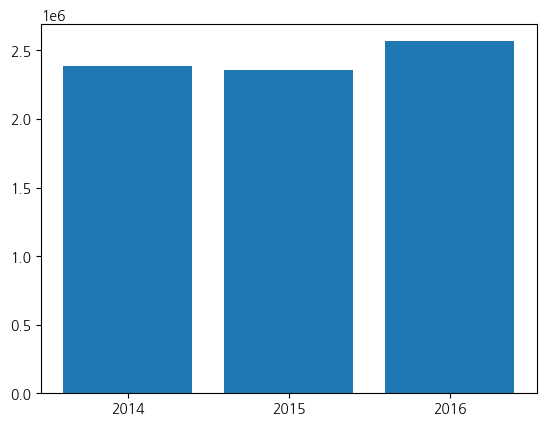

In [40]:
plt.bar(year_eye['year'], year_eye['eye'])

<Figure size 1000x800 with 0 Axes>

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Annual number of eye disease patients')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of eye disease patients')

([0, 1, 2], [Text(0, 0, '2014'), Text(1, 0, '2015'), Text(2, 0, '2016')])

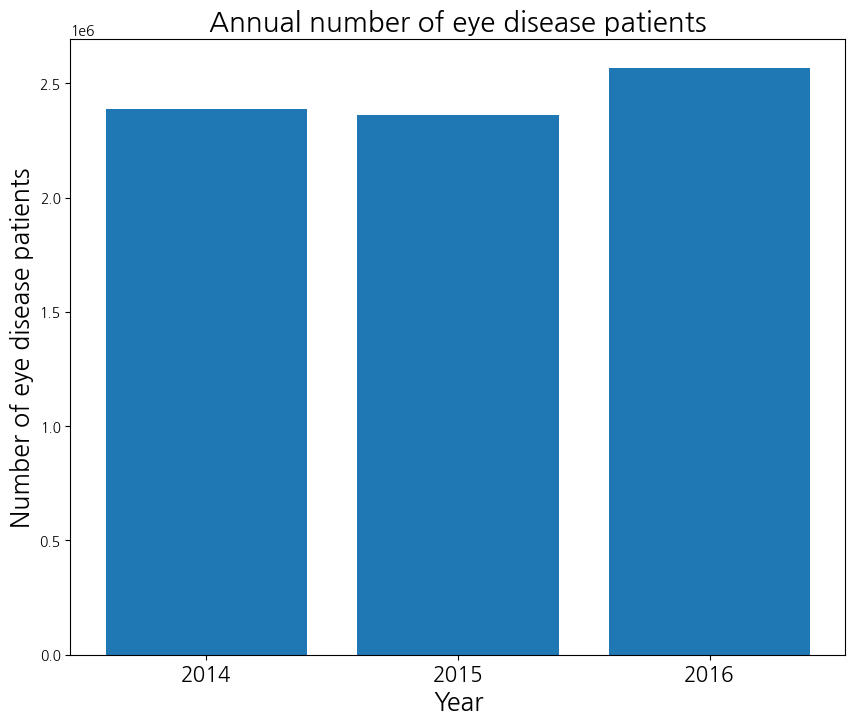

In [41]:
plt.figure(figsize=(10,8))

plt.bar(year_eye['year'], year_eye['eye'])
plt.title('Annual number of eye disease patients', fontsize = 20)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Number of eye disease patients', fontsize = 18)
plt.xticks(fontsize = 15)
plt.show()

<Figure size 1000x800 with 0 Axes>

<BarContainer object of 12 artists>

Text(0.5, 1.0, 'Monthly number of eye disease patients')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of eye disease patients')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '01'),
  Text(1, 0, '02'),
  Text(2, 0, '03'),
  Text(3, 0, '04'),
  Text(4, 0, '05'),
  Text(5, 0, '06'),
  Text(6, 0, '07'),
  Text(7, 0, '08'),
  Text(8, 0, '09'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

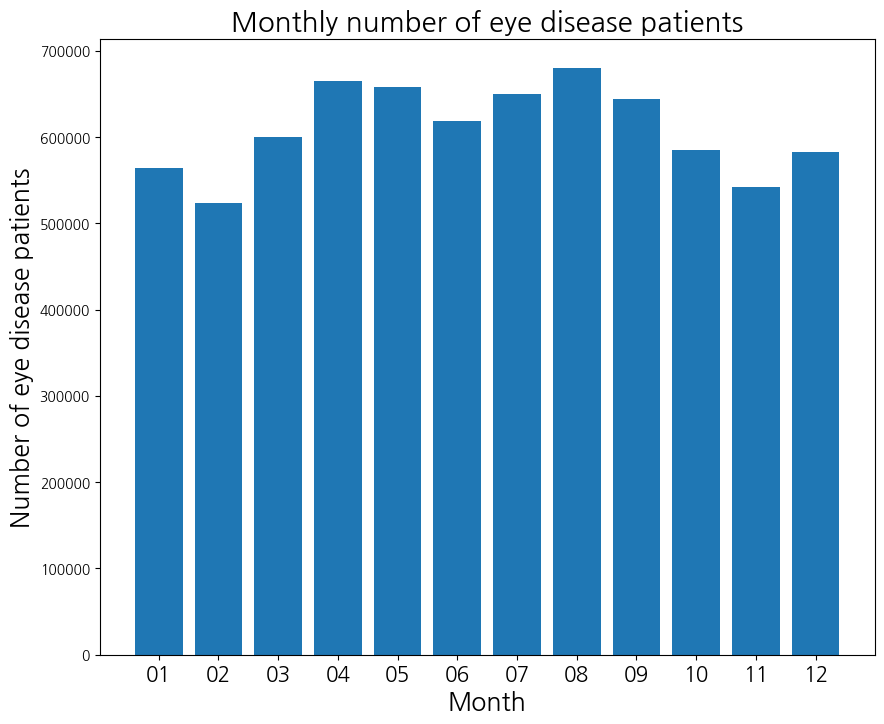

In [ ]:
plt.figure(figsize=(10,8))

plt.bar(month_eye['month'], month_eye['eye'])
plt.title('Monthly number of eye disease patients', fontsize = 20)
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Number of eye disease patients', fontsize = 18)
plt.xticks(fontsize = 15)
plt.show()


<Figure size 2000x800 with 0 Axes>

<BarContainer object of 31 artists>

Text(0.5, 1.0, 'Daily number of eye disease patients')

Text(0.5, 0, 'Daily number')

Text(0, 0.5, 'Number of eye disease patients')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30],
 [Text(0, 0, '01'),
  Text(1, 0, '02'),
  Text(2, 0, '03'),
  Text(3, 0, '04'),
  Text(4, 0, '05'),
  Text(5, 0, '06'),
  Text(6, 0, '07'),
  Text(7, 0, '08'),
  Text(8, 0, '09'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '19'),
  Text(19, 0, '20'),
  Text(20, 0, '21'),
  Text(21, 0, '22'),
  Text(22, 0, '23'),
  Text(23, 0, '24'),
  Text(24, 0, '25'),
  Text(25, 0, '26'),
  Text(26, 0, '27'),
  Text(27, 0, '28'),
  Text(28, 0, '29'),
  Text(29, 0, '30'),
  Text(30, 0, '31')])

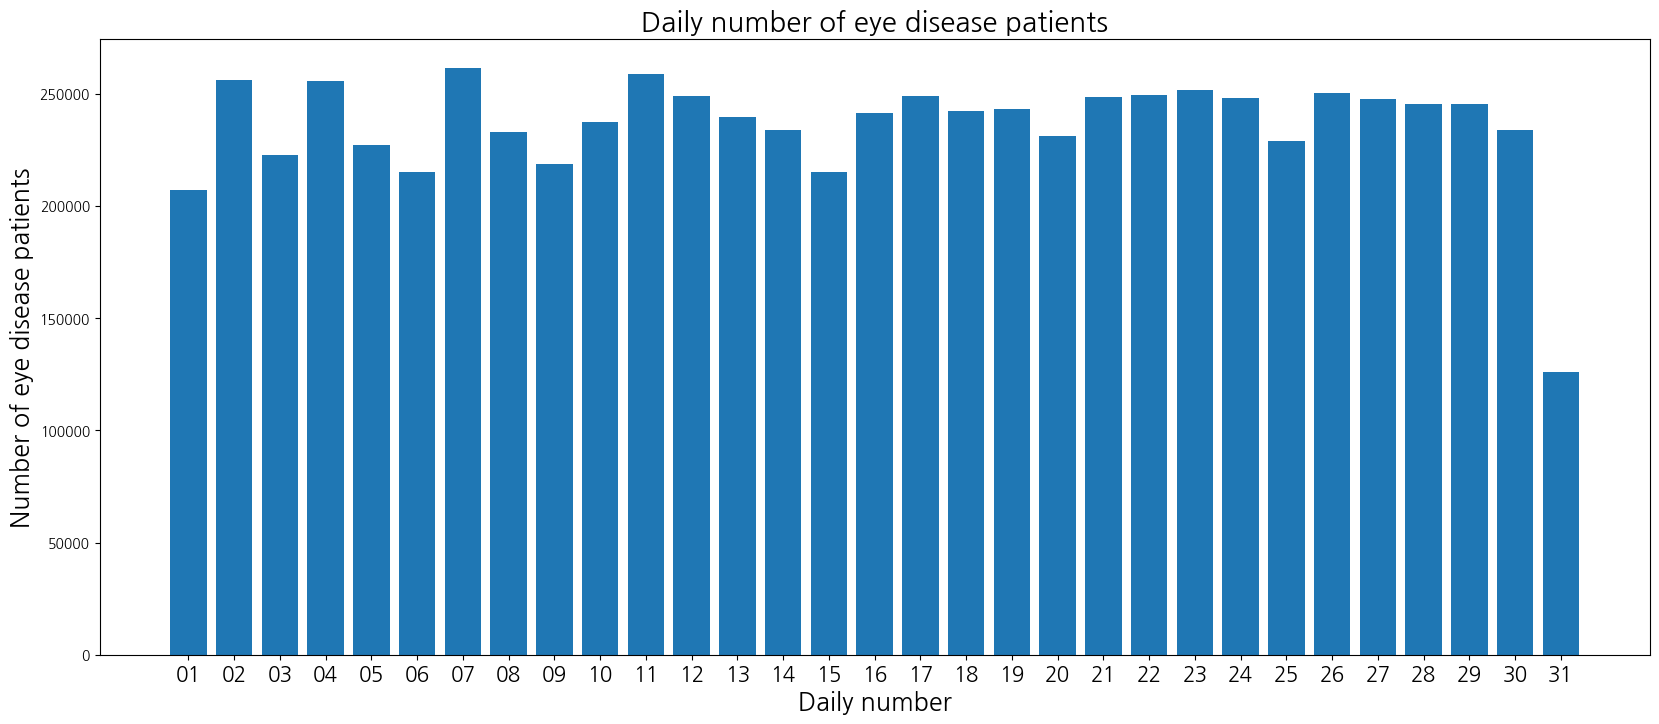

In [ ]:
plt.figure(figsize=(20,8))

plt.bar(day_eye['day'], day_eye['eye'])
plt.title('Daily number of eye disease patients', fontsize = 20)
plt.xlabel('Daily number', fontsize = 18)
plt.ylabel('Number of eye disease patients', fontsize = 18)
plt.xticks(fontsize = 15)
plt.show()

In [ ]:
# 요일별로 확인하기
tot_df['date'] = pd.to_datetime(tot_df['date'])
tot_df['weekday'] = tot_df['date'].dt.day_name()
tot_df['weekday']

,weekday
0,Wednesday
1,Wednesday
2,Wednesday
3,Wednesday
4,Wednesday
...,...
27395,Saturday
27396,Saturday
27397,Saturday
27398,Saturday


In [ ]:
weekday_df = tot_df.groupby(['weekday']).agg({'eye': 'sum'})

weeks = ['Monday','Tuesday','Wednesday','Thursday',"Friday","Saturday","Sunday"]
weekday_df = weekday_df.agg(weeks)
weekday_df.reset_index(inplace=True)
weekday_df.rename(columns = {'index':'weekday'}, inplace=True)
weekday_df

,weekday,eye
0,Monday,1535869
1,Tuesday,1212971
2,Wednesday,1199891
3,Thursday,1155869
4,Friday,1245967
5,Saturday,916539
6,Sunday,45808


<Figure size 2000x800 with 0 Axes>

<BarContainer object of 7 artists>

Text(0.5, 1.0, 'Eye disease patients by weekday')

Text(0.5, 0, 'Weekday')

Text(0, 0.5, 'Number of eye disease patients')

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

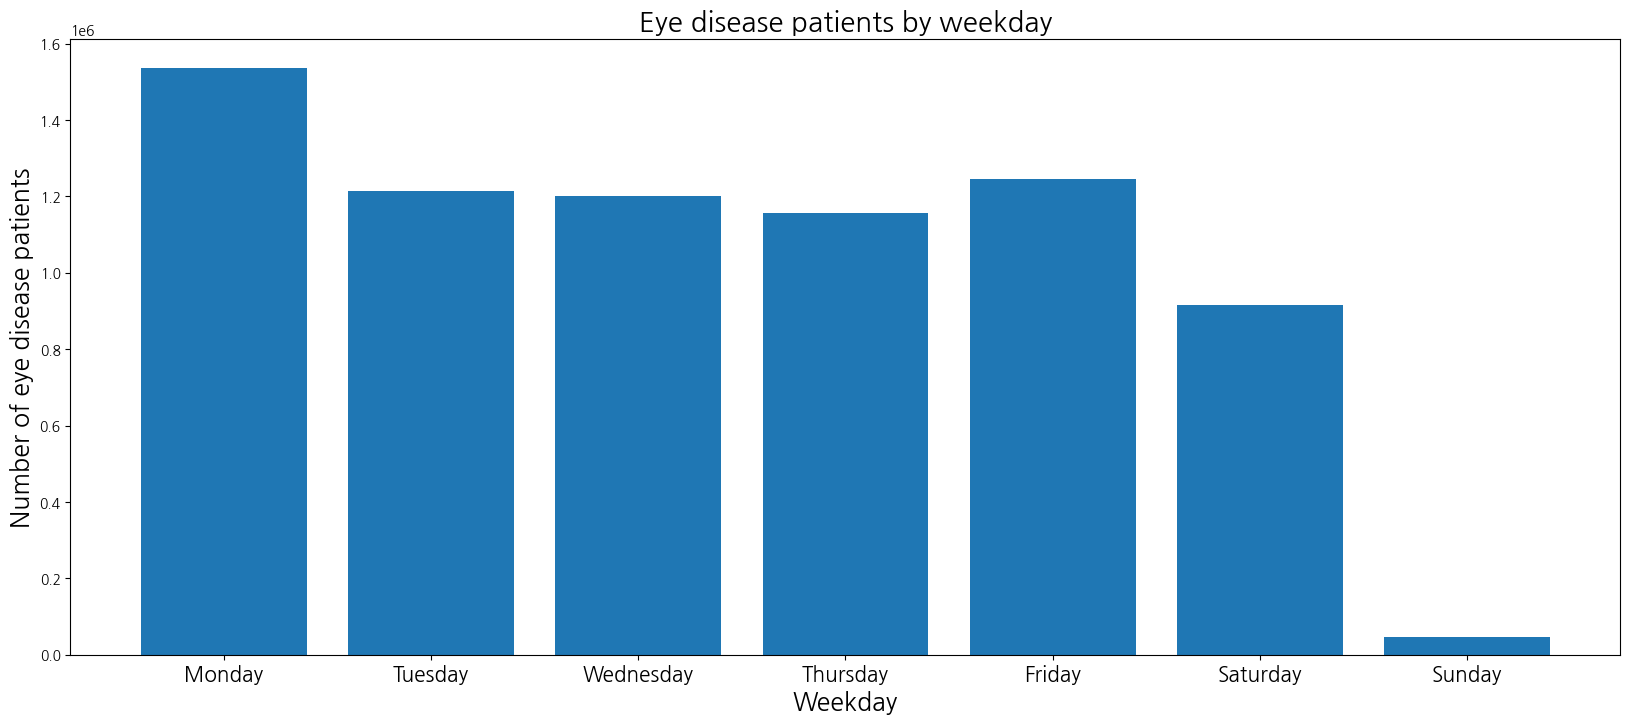

In [ ]:
plt.figure(figsize=(20,8))

plt.bar(weekday_df['weekday'], weekday_df['eye'])
plt.title('Eye disease patients by weekday', fontsize = 20)
plt.xlabel('Weekday', fontsize = 18)
plt.ylabel('Number of eye disease patients', fontsize = 18)
plt.xticks(fontsize = 15)
plt.show()

In [ ]:
# 지역 x 년도별 막대 그래프
region_year_df = tot_df.groupby(['sigungu', 'year']).agg({'eye':'sum'})
region_year_df.reset_index(inplace = True)
region_year_df.head()

,sigungu,year,eye
0,강남구,2014,108419
1,강남구,2015,107757
2,강남구,2016,116858
3,강동구,2014,115112
4,강동구,2015,108598


In [ ]:
popul_df = pd.read_csv("201412_201612_전체.csv")
popul_df.head()

,행정구역,2014년_총인구수,2015년_총인구수,2016년_총인구수
0,서울특별시 종로구 (1111000000),156993,154986,152737
1,서울특별시 중구 (1114000000),128065,125733,125249
2,서울특별시 용산구 (1117000000),235951,233342,230241
3,서울특별시 성동구 (1120000000),296086,297003,299259
4,서울특별시 광진구 (1121500000),363354,360369,357215


In [ ]:
popul_melt = pd.melt(popul_df, id_vars = '행정구역')
popul_melt.head()

,행정구역,variable,value
0,서울특별시 종로구 (1111000000),2014년_총인구수,156993
1,서울특별시 중구 (1114000000),2014년_총인구수,128065
2,서울특별시 용산구 (1117000000),2014년_총인구수,235951
3,서울특별시 성동구 (1120000000),2014년_총인구수,296086
4,서울특별시 광진구 (1121500000),2014년_총인구수,363354


In [ ]:
popul_melt['year'] = popul_melt['variable'].str[0:4]
popul_melt['sigungu'] = popul_melt['행정구역'].str.split(' ').str[1]
popul_melt = popul_melt.loc[:,['sigungu', 'year', 'value']]
popul_melt.head()

,sigungu,year,value
0,종로구,2014,156993
1,중구,2014,128065
2,용산구,2014,235951
3,성동구,2014,296086
4,광진구,2014,363354


In [ ]:
# 인구수 보정하기
region_year_df = pd.merge(region_year_df, popul_melt, on = ['sigungu', 'year'], how = 'left')
region_year_df.head()
region_year_df['modi_eye'] = region_year_df['eye']/region_year_df['value']
region_year_df.head()

,sigungu,year,eye,value
0,강남구,2014,108419,578114
1,강남구,2015,107757,576495
2,강남구,2016,116858,567115
3,강동구,2014,115112,476597
4,강동구,2015,108598,458658


,sigungu,year,eye,value,modi_eye
0,강남구,2014,108419,578114,0.187539
1,강남구,2015,107757,576495,0.186917
2,강남구,2016,116858,567115,0.206057
3,강동구,2014,115112,476597,0.241529
4,강동구,2015,108598,458658,0.236773


<Figure size 6000x800 with 0 Axes>

<Axes: xlabel='sigungu', ylabel='modi_eye'>

Text(0.5, 1.0, '지역별 연도별 평균 눈병 환자 수')

Text(0, 0.5, '평균 눈병 환자 수')

Text(0.5, 0, '지역')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '강남구'),
  Text(1, 0, '강동구'),
  Text(2, 0, '강북구'),
  Text(3, 0, '강서구'),
  Text(4, 0, '관악구'),
  Text(5, 0, '광진구'),
  Text(6, 0, '구로구'),
  Text(7, 0, '금천구'),
  Text(8, 0, '노원구'),
  Text(9, 0, '도봉구'),
  Text(10, 0, '동대문구'),
  Text(11, 0, '동작구'),
  Text(12, 0, '마포구'),
  Text(13, 0, '서대문구'),
  Text(14, 0, '서초구'),
  Text(15, 0, '성동구'),
  Text(16, 0, '성북구'),
  Text(17, 0, '송파구'),
  Text(18, 0, '양천구'),
  Text(19, 0, '영등포구'),
  Text(20, 0, '용산구'),
  Text(21, 0, '은평구'),
  Text(22, 0, '종로구'),
  Text(23, 0, '중구'),
  Text(24, 0, '중랑구')])

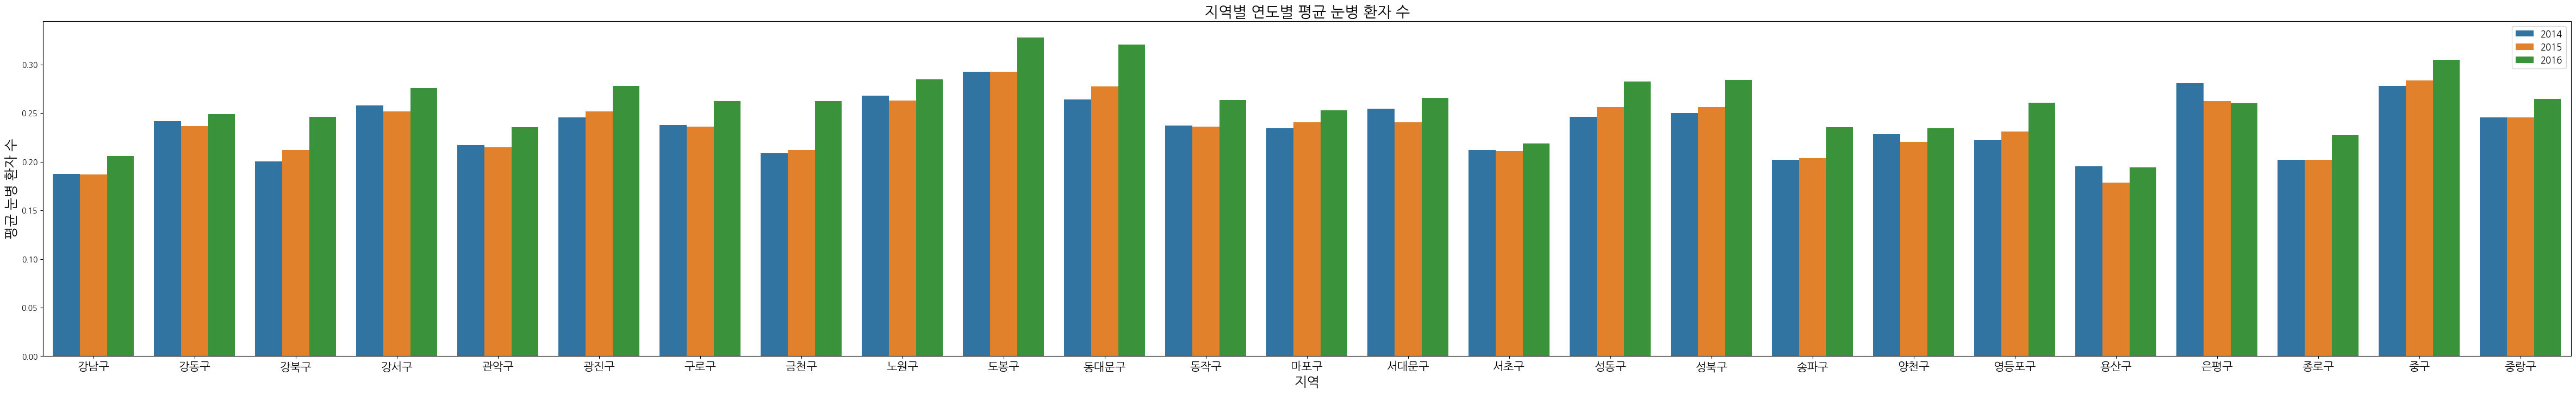

In [ ]:
plt.figure(figsize=(60,8))

sns.barplot(x = 'sigungu', y = 'modi_eye', hue = 'year', data = region_year_df, dodge = True)
plt.title('Average number of eye disease patients by region and year', fontsize = 20)
plt.ylabel('Average number of eye disease patients', fontsize = 18)
plt.xlabel('Region', fontsize = 18)
plt.xticks(fontsize = 15)
plt.legend(fontsize=12)
plt.show()

In [ ]:
# date별 총 눈병 환자수 트렌드
tot_df2 = tot_df.groupby(['date']).agg({'avg_temp': 'mean',
                                        'min_temp': 'mean',
                                        'max_temp': 'mean',
                                        'avg_humi': 'mean',
                                        'min_humi': 'mean',
                                        'eye' : 'sum'})
tot_df2.reset_index(inplace = True)
tot_df2['date'] = pd.to_datetime(tot_df2['date'])
tot_df2.head()

,date,avg_temp,min_temp,max_temp,avg_humi,min_humi,eye
0,2014-01-01,4.468,0.724,8.112,59.756,35.060,247
1,2014-01-02,1.920,-1.076,6.076,40.672,21.608,8811
2,2014-01-03,2.656,-1.032,7.372,56.164,39.972,7829
3,2014-01-04,0.224,-3.156,4.908,52.112,42.680,6350
4,2014-01-05,-0.364,-3.716,3.812,51.544,32.912,234


<Figure size 5000x800 with 0 Axes>

Text(0.5, 1.0, 'Daily trends in the total number of patients with eye disease')

Text(0.5, 0, 'date')

Text(0, 0.5, 'Total numboer of patients with eye disease')

(array([16071., 16191., 16314., 16436., 16556., 16679., 16801., 16922.,
        17045., 17167.]),
 [Text(16071.0, 0, '2014-01'),
  Text(16191.0, 0, '2014-05'),
  Text(16314.0, 0, '2014-09'),
  Text(16436.0, 0, '2015-01'),
  Text(16556.0, 0, '2015-05'),
  Text(16679.0, 0, '2015-09'),
  Text(16801.0, 0, '2016-01'),
  Text(16922.0, 0, '2016-05'),
  Text(17045.0, 0, '2016-09'),
  Text(17167.0, 0, '2017-01')])

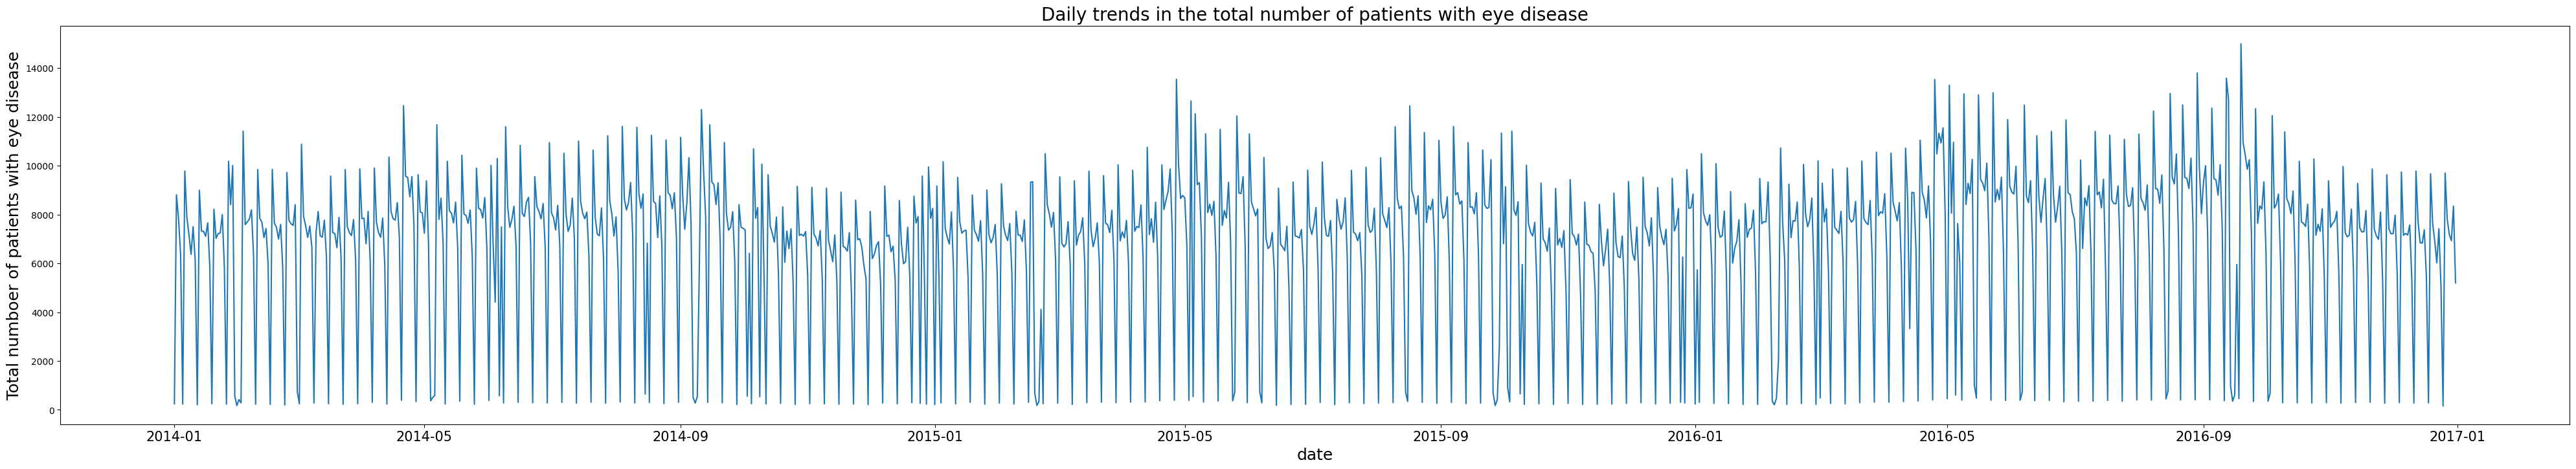

In [ ]:
plt.figure(figsize=(50,8))
plt.plot(tot_df2['date'], tot_df2['eye'])
plt.title('Daily trends in the total number of patients with eye disease', fontsize = 20)
plt.xlabel('date', fontsize = 18)
plt.ylabel('Total numboer of patients with eye disease', fontsize = 18)
plt.xticks(fontsize = 15)

plt.show()

<Figure size 5000x800 with 0 Axes>

(-20.0, 40.0)

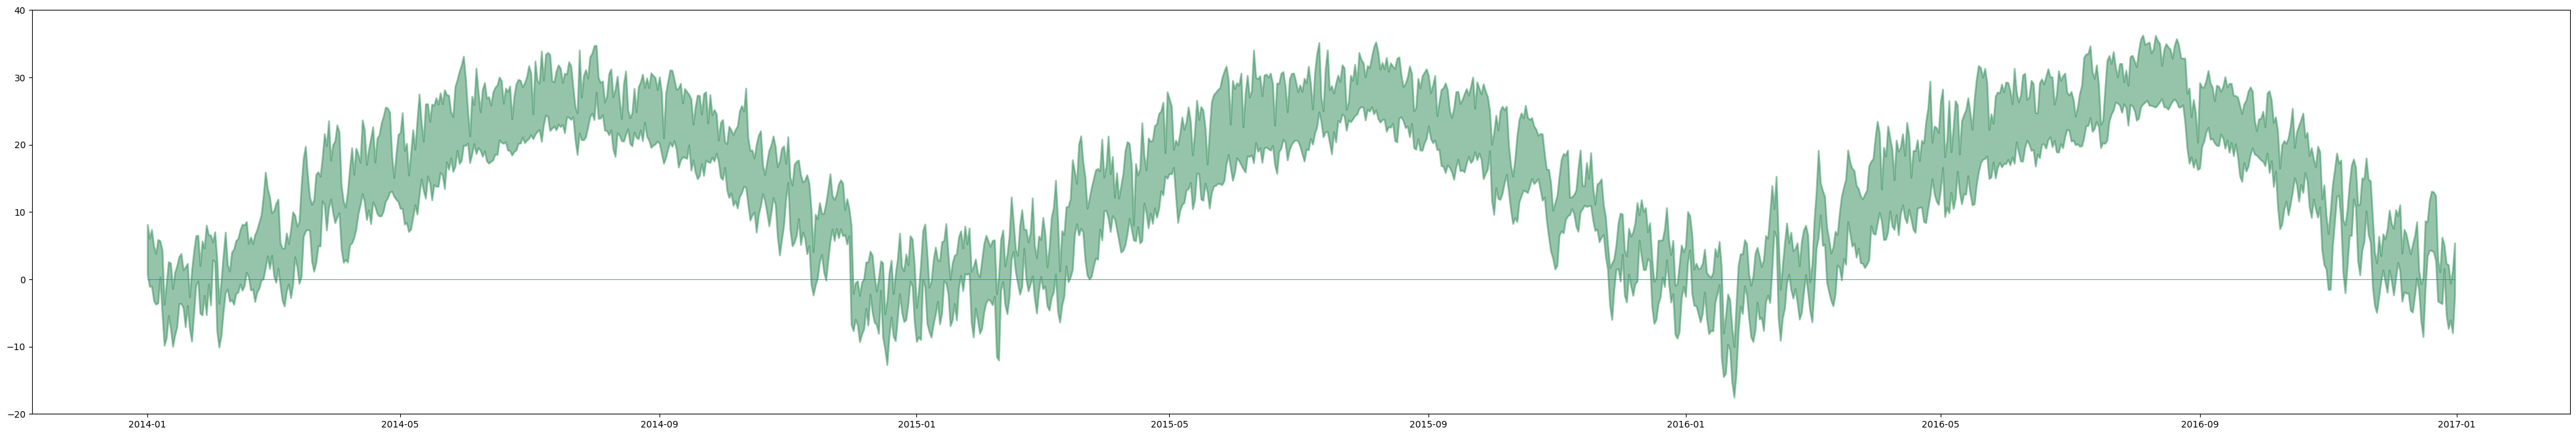

In [ ]:
# date별 온도 트렌드 확인하기 (최대 최소 온도 그래프 확인)
plt.figure(figsize=(50,8))
plt.fill_between(tot_df2.date, y1 = tot_df2.max_temp, y2 = tot_df2.min_temp, alpha = 0.5, linewidth = 2, color = 'seagreen')
plt.ylim(-20, 40)
plt.hlines(y = 0, xmin=np.min(tot_df2.date), xmax=np.max(tot_df2.date), linewidth = .5)

plt.show()

In [ ]:
# 상관계수 행렬
corr = tot_df2.drop('date', axis = 1).corr(method = 'pearson')
corr

,avg_temp,min_temp,max_temp,avg_humi,min_humi,eye
avg_temp,1.000000,0.990404,0.991400,0.372414,0.290589,0.119131
min_temp,0.990404,1.000000,0.967374,0.438695,0.369674,0.104893
max_temp,0.991400,0.967374,1.000000,0.304180,0.205905,0.128671
avg_humi,0.372414,0.438695,0.304180,1.000000,0.889550,-0.057726
min_humi,0.290589,0.369674,0.205905,0.889550,1.000000,-0.051785
eye,0.119131,0.104893,0.128671,-0.057726,-0.051785,1.000000


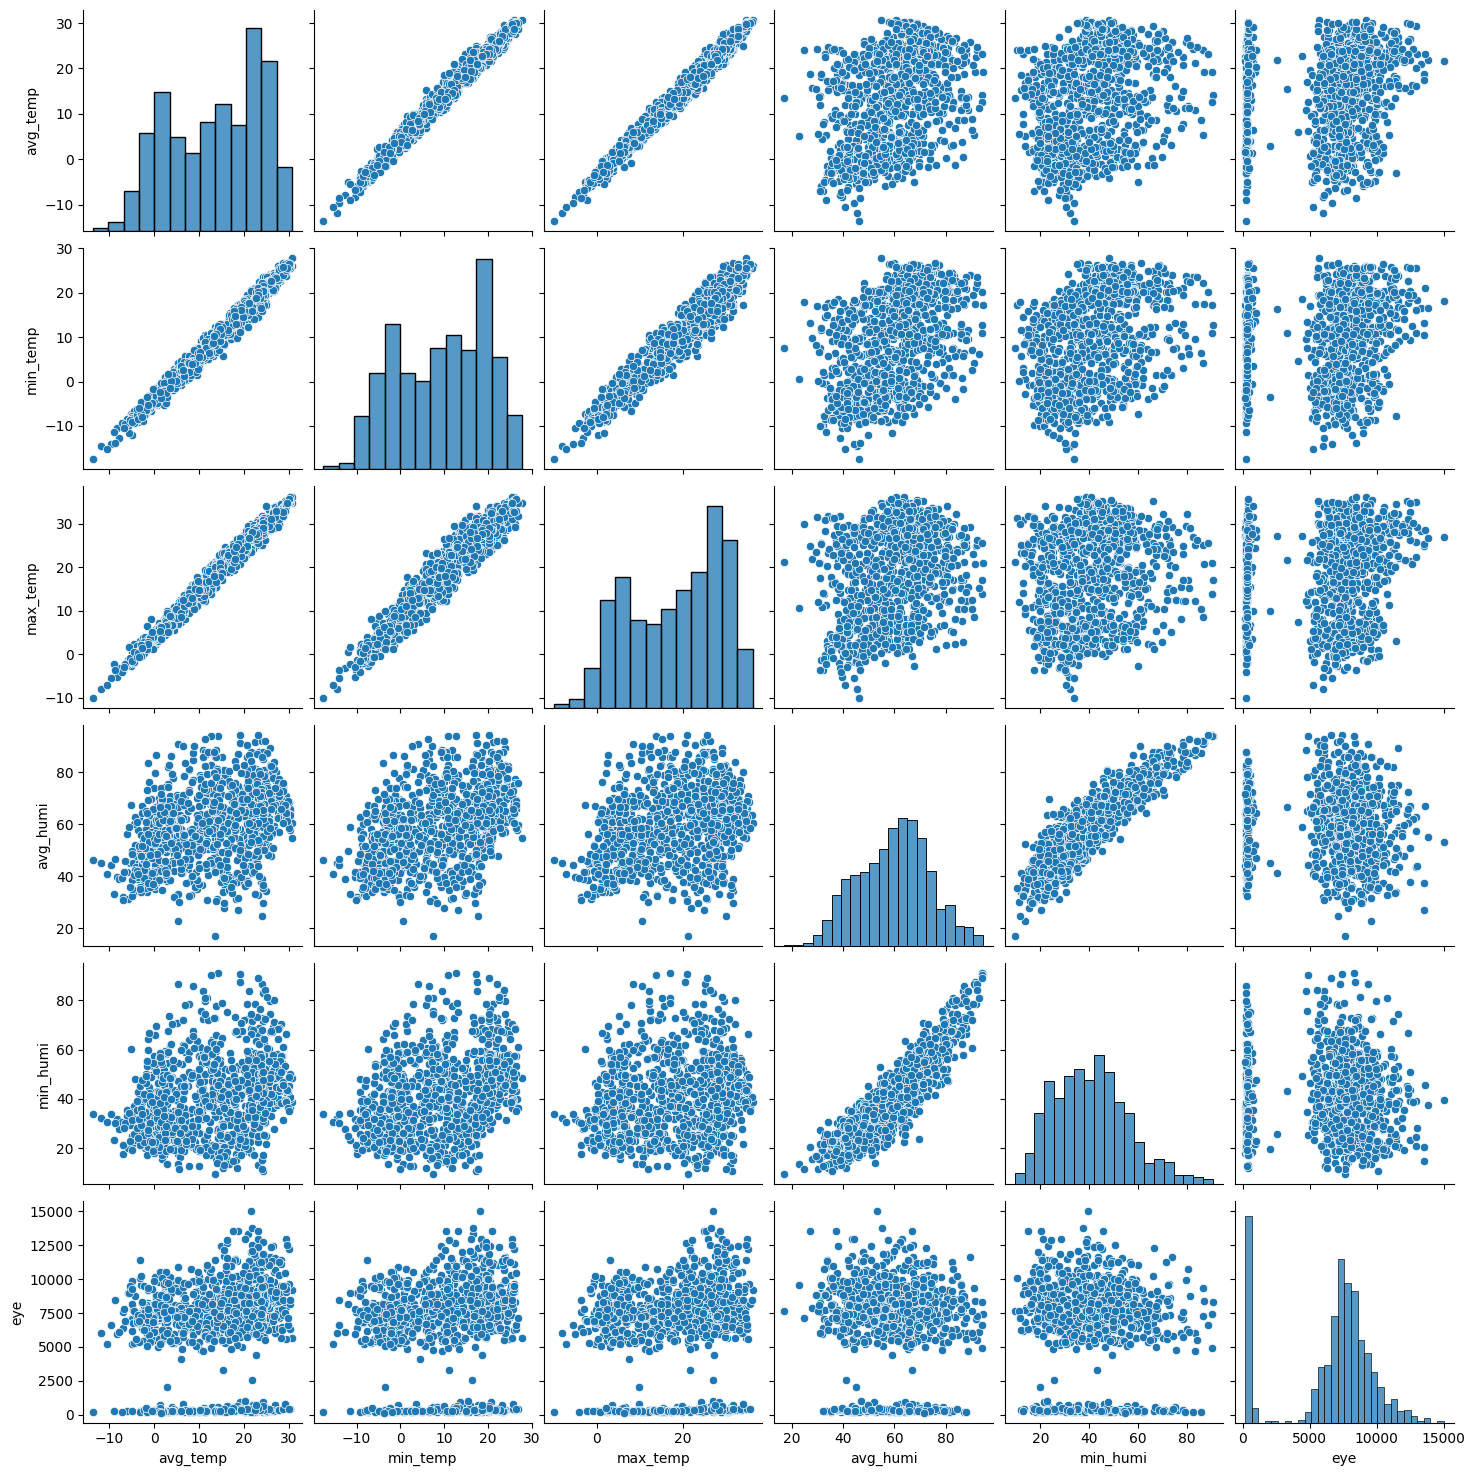

In [ ]:
# 산점도 plot 확인
sns.pairplot(tot_df2.drop('date', axis = 1))
plt.show()

<Figure size 1500x1500 with 0 Axes>

<Axes: >

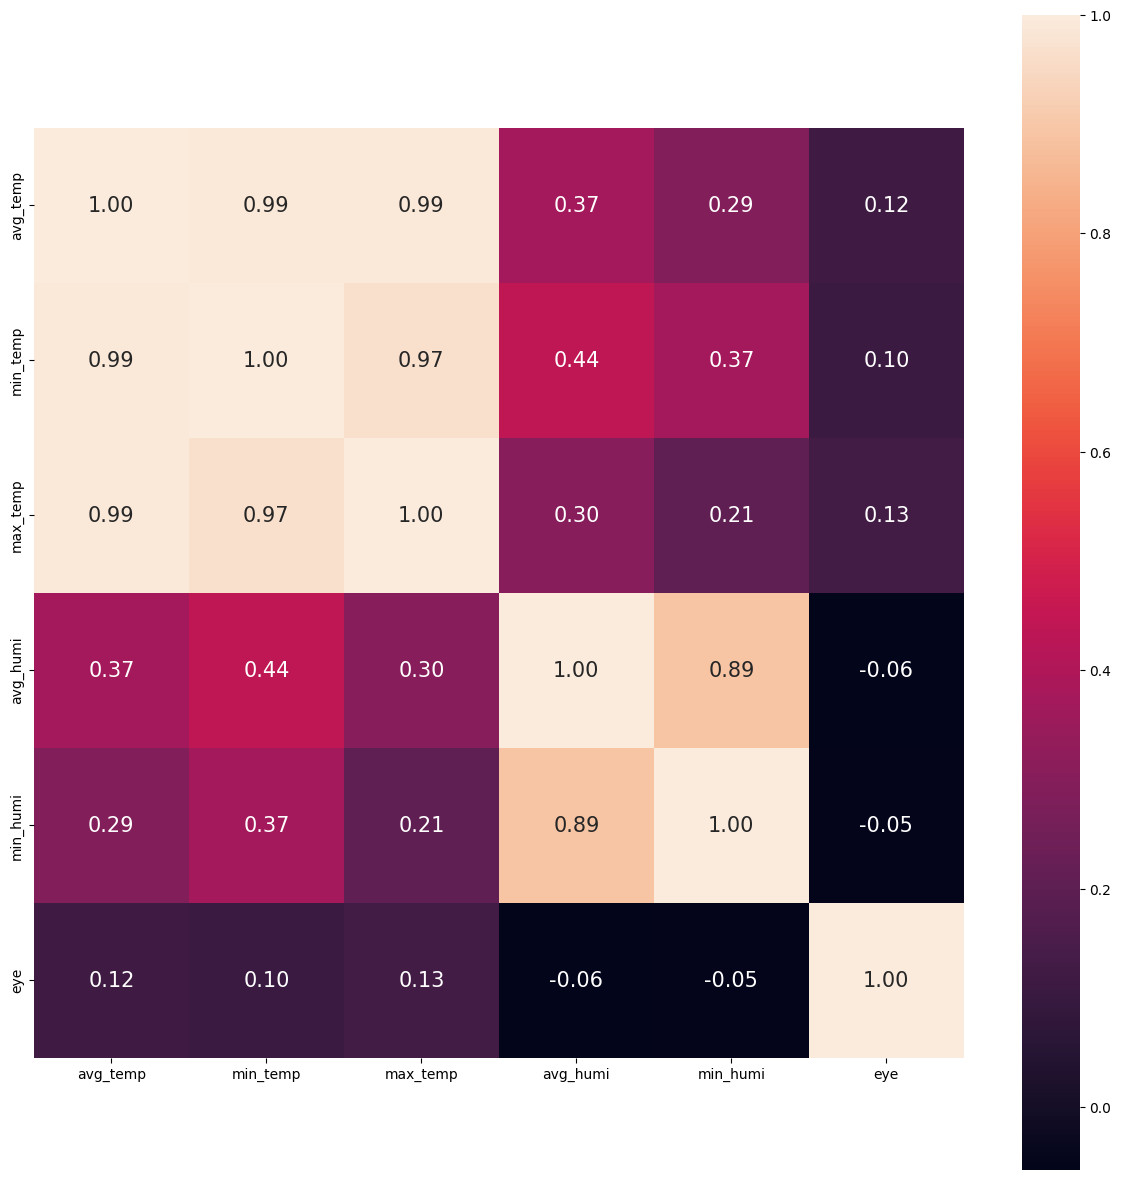

In [ ]:
# heatmap
plt.figure(figsize=(15,15))
sns.heatmap(corr.values,  #데이터
            cbar=True,    #오른쪽 컬러 막대 출력 여부
            annot=True,   #차트에 숫자를 보여줄 것인지 여부
            square=True,  #차트를 정사각형으로 할 것인지
            fmt='.2f',    #숫자의 출력 소수점 자리 개수 조절
            annot_kws={'size': 15}, #숫자 출력 시 숫자 크기 조절
            yticklabels=corr.columns, #y축에 컬럼명 출력
            xticklabels=corr.columns) #x축에 컬럼명 출력
plt.show()